Notebook to analyze list of tropical cyclones compiled from IBTrACS data by Frederick Tam.

Parent dataset: International Best Track Archive for Climate Stewardship [IBTrACS](https://www.ncei.noaa.gov/products/international-best-track-archive)


James Ruppert  
jruppert@ou.edu  
10/07/24

### Main settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [2]:
list_path = "../storm-lists/stormlist_withMPIdistance.csv"
df = pd.read_csv(list_path)#, sep=',', on_bad_lines='skip', skiprows=4)

In [3]:
df

,Unnamed: 0,index,name,id,mean_shear,time_before_tcg,mean_shear_hu,time_before_hu,lat,E_MPI,distance
0,0,13,2000_SHANSHAN,"['wp262000', 'WP_26']",6.241797,60,3.094575,36,15.1500,63.411490,2970.382269
1,1,19,2000_SAOMAI,"['wp222000', 'WP_22']",3.096483,24,4.882538,36,15.9900,70.234010,2224.307203
2,2,24,2000_BILIS,"['wp182000', 'WP_18']",2.984449,36,3.176979,24,12.5308,77.146203,1236.925745
3,3,2,2001_KROSA,"['wp242001', 'WP_24']",3.947990,24,5.985582,24,15.1077,NaN,1881.174024
4,4,3,2001_LINGLING,"['wp272001', 'WP_27']",6.502896,48,8.491656,48,10.7000,NaN,27.310874
...,...,...,...,...,...,...,...,...,...,...,...
258,258,9,2019_LORENZO,"['al132019', 'AL_13']",4.807510,12,5.775757,48,11.0000,81.592855,452.060978
259,259,16,2020_ETA,"['al292020', 'AL_29']",4.185665,12,4.129712,36,14.9000,98.657236,361.383512
260,260,17,2020_LAURA,"['al132020', 'AL_13']",7.504969,36,10.385125,108,17.0000,83.262945,826.302321
261,261,24,2020_TEDDY,"['al202020', 'AL_20']",9.231384,48,7.003615,48,12.9000,83.946964,1402.462279


### Plots

#### Plot functions

In [4]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

rc('font', **font)

sns.set_theme(style="darkgrid", rc={'xtick.bottom': True, 'ytick.left': True,})

In [46]:
def add_var(figdata, ax, toggle=0):
    ax.set_title(figdata['vartag'])
    ax.set_ylabel('Count')
    ax.set_xlabel('Units = '+figdata['units'])
    sns.histplot(figdata['pltvar'], ax=ax, kde=True, bins=figdata['bins'])#, label=figdata['count'])
    default_colors = sns.color_palette()
    median = np.nanmedian(figdata['pltvar'])
    if toggle == 0:
        linestyle='-.'
    else:
        linestyle='--'
    ax.axvline(median, color=default_colors[toggle], linestyle=linestyle, label='Median = '+str(round(median, 2)))
    ax.legend()

#### Full dataset

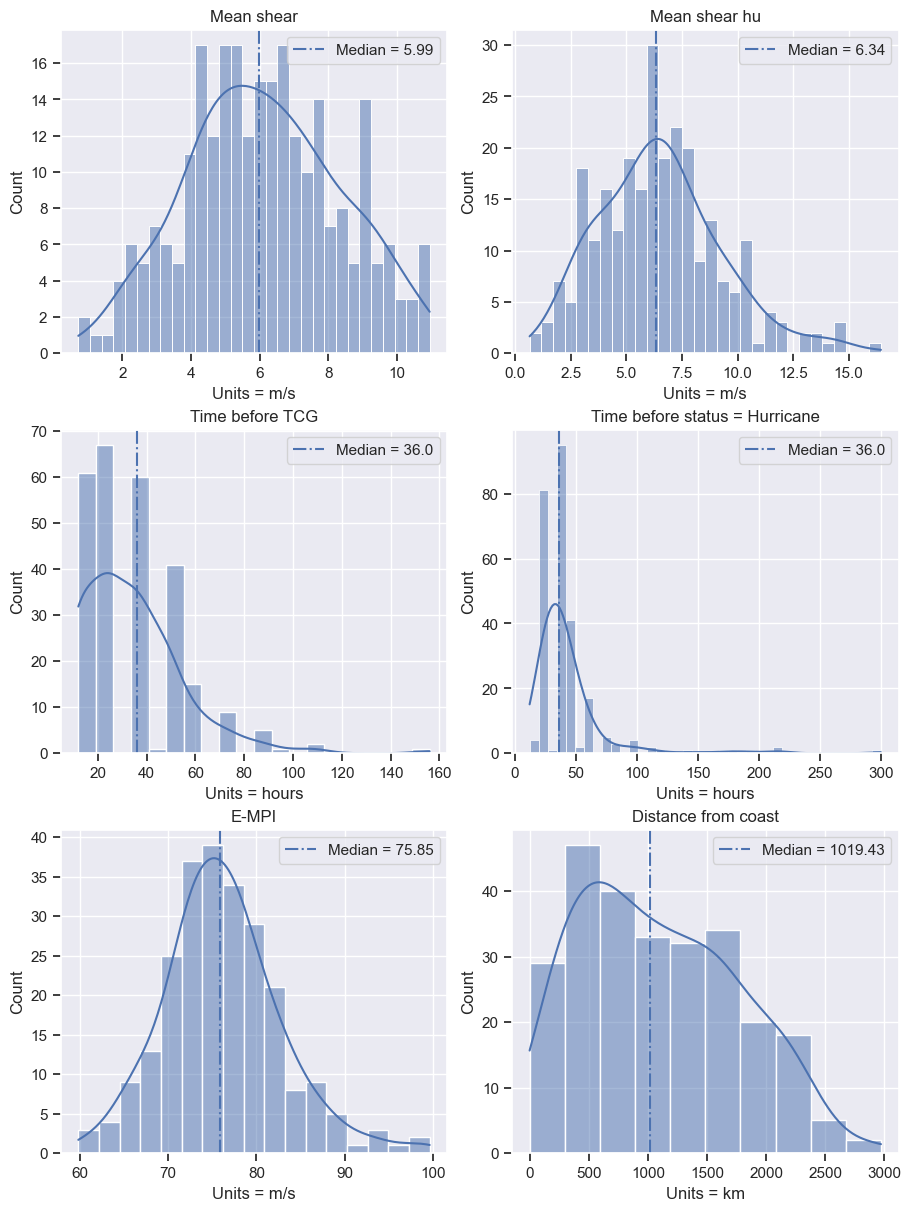

In [48]:
fig_x = 9
fig_y = 12
fig, axs = plt.subplots(3, 2, figsize=(fig_x,fig_y), layout='constrained', squeeze=True)

figdata = {
    'pltvar': df['mean_shear'],
    'vartag': 'Mean shear',
    'units': 'm/s',
    'bins': 30,
           }

add_var(figdata, axs[0,0])

################################

figdata = {
    'pltvar': df['mean_shear_hu'],
    'vartag': 'Mean shear hu',
    'units': 'm/s',
    'bins': 30,
           }

add_var(figdata, axs[0,1])

################################

figdata = {
    'pltvar': df['time_before_tcg'],
    'vartag': 'Time before TCG',
    'units': 'hours',
    'bins': 'auto',
           }

add_var(figdata, axs[1,0])

################################

figdata = {
    'pltvar': df['time_before_hu'],
    'vartag': 'Time before status = Hurricane',
    'units': 'hours',
    'bins': 'auto',
           }

add_var(figdata, axs[1,1])

################################

figdata = {
    'pltvar': df['E_MPI'],
    'vartag': 'E-MPI',
    'units': 'm/s',
    'bins': 'auto',
           }

add_var(figdata, axs[2,0])

################################

figdata = {
    'pltvar': df['distance'],
    'vartag': 'Distance from coast',
    'units': 'km',
    'bins': 'auto',
           }

add_var(figdata, axs[2,1])

plt.show()
plt.close()

#### Using selection critera

In [32]:
min_dfc = 500 # max distance from coast

subset = df[df['distance'] >= min_dfc]

# Number of cases in original dataset
n_original = "Count = "+str(len(df))
print('Number of cases in original dataset:', n_original)
# Number of cases in selected subset
n_subset = "Count = "+str(len(subset))
print('Number of cases in selected subset:', n_subset)

Number of cases in original dataset: Count = 263
Number of cases in selected subset: Count = 202


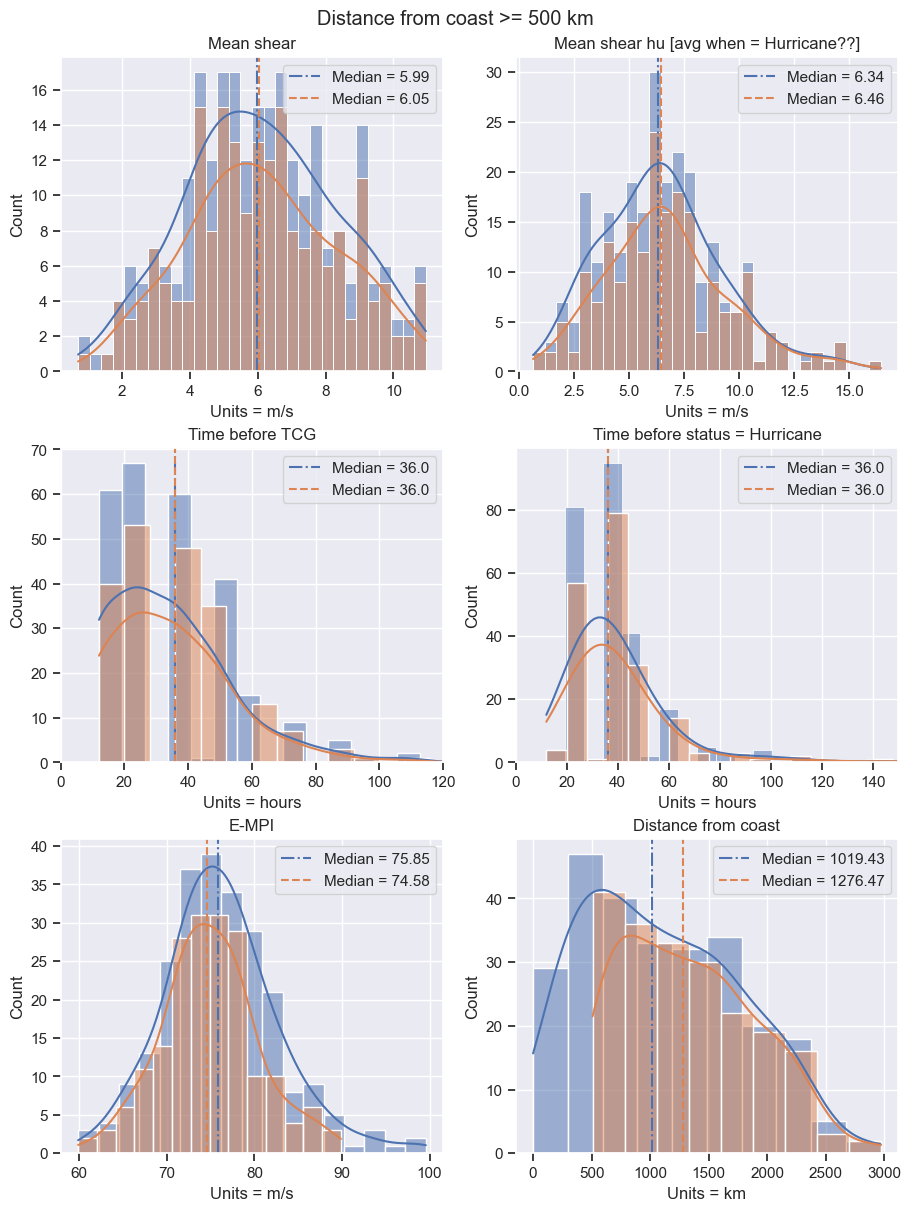

In [47]:
fig_x = 9
fig_y = 12
fig, axs = plt.subplots(3, 2, figsize=(fig_x,fig_y), layout='constrained', squeeze=True)

plt.suptitle('Distance from coast >= '+str(min_dfc)+' km')

# for idataset in [df, subset]:
for itoggle in range(2):

    if itoggle == 0:
        idataset = df
    else:
        idataset = subset

    figdata = {
        'pltvar': idataset['mean_shear'],
        'vartag': 'Mean shear',
        'units': 'm/s',
        'bins': 30,
        'count': n_original if itoggle == 0 else n_subset,
            }

    add_var(figdata, axs[0,0], toggle=itoggle)

    ################################

    figdata = {
        'pltvar': idataset['mean_shear_hu'],
        'vartag': 'Mean shear hu [avg when = Hurricane??]',
        'units': 'm/s',
        'bins': 30,
        'count': n_original if itoggle == 0 else n_subset,
            }

    add_var(figdata, axs[0,1], toggle=itoggle)

    ################################

    figdata = {
        'pltvar': idataset['time_before_tcg'],
        'vartag': 'Time before TCG',
        'units': 'hours',
        'bins': 'auto',
        'count': n_original if itoggle == 0 else n_subset,
            }

    add_var(figdata, axs[1,0], toggle=itoggle)
    axs[1,0].set_xlim(0, 120)

    ################################

    figdata = {
        'pltvar': idataset['time_before_hu'],
        'vartag': 'Time before status = Hurricane',
        'units': 'hours',
        'bins': 'auto',
        'count': n_original if itoggle == 0 else n_subset,
            }

    add_var(figdata, axs[1,1], toggle=itoggle)
    axs[1,1].set_xlim(0, 150)

    ################################

    figdata = {
        'pltvar': idataset['E_MPI'],
        'vartag': 'E-MPI',
        'units': 'm/s',
        'bins': 'auto',
        'count': n_original if itoggle == 0 else n_subset,
            }

    add_var(figdata, axs[2,0], toggle=itoggle)

    ################################

    figdata = {
        'pltvar': idataset['distance'],
        'vartag': 'Distance from coast',
        'units': 'km',
        'bins': 'auto',
        'count': n_original if itoggle == 0 else n_subset,
            }

    add_var(figdata, axs[2,1], toggle=itoggle)

# axs[0,1].legend()#loc='upper right')
plt.show()
plt.close()